# Migration exploration part 3: projecting sample on the full dataset

In the explorations notebook part 1 we explored general tendencies in both the image data and the sample. There is more to explore in the combination of both measures.
We can take into account the non-event information, looking at formal data on the cards and their influence on 
both the events and the information density as measured in edges. This means we have to compare different data sets.

First we have to set up the sets again

__TODO__:
_administrative features_:
* schemes
* timespan of events
* model of cards (using ocr)

_personal features_:
* unit type
* unit size
* religion
* age at time of arrival (main migrant)
* place of origin
* number of living adresses

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#setup the sample

steekproef = pd.ExcelFile("/Users/rikhoekstra/surfdrive/emigratie/emigrantenkaarten/migrant_steekproef_masterdb_20180629.xlsx")
steekproef.sheet_names

['emmigrantunits',
 'emcards',
 'emtravels',
 'emwaardeoordeels',
 'emimages',
 'emevents',
 'emactors',
 'emactorinstitutions',
 'lookup_instellingen',
 'emeventtypes',
 'emcardcatalogs',
 'emconsulates',
 'emvervoermiddels',
 'emtypevervoers',
 'emschemas',
 'emlocations',
 'emreligions',
 'orig',
 'reserve']

In [184]:
units = pd.read_csv('csvs/units_select_with_datum.csv', sep='\t')
units.persoonsId = units.persoonsId.astype('int64')
units.head()

,Unnamed: 0,persoonsId,initialen,tussenvoegsel,achternaam,geboortejaar,hasBirthPlace,hasResidenceLocation,hasSchema,hasUnit,samenstelling,geslacht,hasReligion,adresAantal,year,migrantid
0,0,34120,J.A.M.,NaN,Boschker,1932,NaN,Aalten,NAMA,6,Gezin,NaN,RK,3.0,1956,34120
1,1,46567,N.J.,NaN,Schipper,1933,NaN,Abbekerk,NAMA,1,Alleen,Man,RK,1.0,1955,46567
2,2,3053,Th.H.A.,van den,Broek,1914,NaN,Afferden,NAMA,7,Gezin,NaN,RK,2.0,1958,3053
3,3,3053,Th.H.A.,van den,Broek,1914,NaN,Afferden,NAMA,7,Gezin,NaN,RK,2.0,1984,3053
4,4,3053,Th.H.A.,van den,Broek,1914,NaN,NaN,LP-VER,7,Echtpaar,NaN,NaN,1.0,1958,3053


In [8]:
sampled_edges = pd.read_csv('csvs/sampled_edges.csv', sep='\t')
sampled_edges.head()

,Unnamed: 0,orig volgorde,kaartnummer,isStoredAt,jaartal_begin,jaartal_eind,referencesPerson,referencesCollective,is duplicaat,waardes tussen de duplicaten komen overeen,im_nr,imnm,kaart_nr,map,edges,image,imnr
0,0,469.0,t_20180328_1,Sydney,1961,1966.0,38405,Melbourne,moet toegekend ontbreekt in masterdb,NaN,35_1201,1201,t_20180328_1,35,2099,NL-HaNA_2.05.159_35_1201.jpg,1201
1,1,NaN,t_20180328_2,Melbourne,1962,1964.0,22345,Adelaide,NaN,NaN,26_0423,423,t_20180328_2,26,3954,NL-HaNA_2.05.159_26_0423.jpg,423
2,2,NaN,t_20180328_3,melbourne,1968,1968.0,22766,Sydney,NaN,NaN,26_0043,43,t_20180328_3,26,1500,NL-HaNA_2.05.159_26_0043.jpg,43
3,3,NaN,t_20180405_4,Melbourne,1956,1960.0,34973,Melbourne,NaN,NaN,11_0003,3,t_20180405_4,11,3326,NL-HaNA_2.05.159_11_0003.jpg,3
4,4,366.0,76abc6fc-e8eb-102c-b6de-005056a23d00,Sydney,NaN,NaN,1,Sydney,NaN,NaN,29_0001,1,76abc6fc-e8eb-102c-b6de-005056a23d00,29,921,NL-HaNA_2.05.159_29_0001.jpg,1


In [185]:



# let's start with the migration schemes but we first have to join the images and basic data about the migrants
units_edges = pd.merge(units, sampled_edges, left_on = 'persoonsId', right_on = 'referencesPerson')
units_edges = units_edges.drop([name for name in units_edges.columns if name.find('Unnamed: ') > -1], axis=1)
units_edges.head()

,persoonsId,initialen,tussenvoegsel,achternaam,geboortejaar,hasBirthPlace,hasResidenceLocation,hasSchema,hasUnit,samenstelling,...,referencesCollective,is duplicaat,waardes tussen de duplicaten komen overeen,im_nr,imnm,kaart_nr,map,edges,image,imnr
0,34120,J.A.M.,NaN,Boschker,1932,NaN,Aalten,NAMA,6,Gezin,...,Geen,NaN,NaN,9_2011,2011,79869974-e8eb-102c-b6de-005056a23d00,9,2090,NL-HaNA_2.05.159_9_2011.jpg,2011
1,46567,N.J.,NaN,Schipper,1933,NaN,Abbekerk,NAMA,1,Alleen,...,Geen,NaN,NaN,21_1801,1801,7a91d694-e8eb-102c-b6de-005056a23d00,21,1390,NL-HaNA_2.05.159_21_1801.jpg,1801
2,3053,Th.H.A.,van den,Broek,1914,NaN,Afferden,NAMA,7,Gezin,...,Sydney,NaN,NaN,31_1201,1201,76ed6b98-e8eb-102c-b6de-005056a23d00,31,2311,NL-HaNA_2.05.159_31_1201.jpg,1201
3,3053,Th.H.A.,van den,Broek,1914,NaN,Afferden,NAMA,7,Gezin,...,Sydney,NaN,NaN,31_1203,1203,76ed70e8-e8eb-102c-b6de-005056a23d00,31,1176,NL-HaNA_2.05.159_31_1203.jpg,1203
4,3053,Th.H.A.,van den,Broek,1914,NaN,Afferden,NAMA,7,Gezin,...,Sydney,NaN,NaN,31_1201,1201,76ed6b98-e8eb-102c-b6de-005056a23d00,31,2311,NL-HaNA_2.05.159_31_1201.jpg,1201


In [51]:
print(units_edges.columns) # for later reference
print(len(units_edges)) # for later comparison

Index(['persoonsId', 'initialen', 'tussenvoegsel', 'achternaam',
       'geboortejaar', 'hasBirthPlace', 'hasResidenceLocation', 'hasSchema',
       'hasUnit', 'samenstelling', 'geslacht', 'hasReligion', 'adresAantal',
       'year', 'migrantid', 'orig volgorde', 'kaartnummer', 'isStoredAt',
       'jaartal_begin', 'jaartal_eind', 'referencesPerson',
       'referencesCollective', 'is duplicaat',
       'waardes tussen de duplicaten komen overeen', 'im_nr', 'imnm',
       'kaart_nr', 'map', 'edges', 'image', 'imnr'],
      dtype='object')
1660


In [56]:
len(units_edges.persoonsId.unique())

439

In [75]:
# the events now are separate records, but for our analysis we need to reduce them to individual units (persons)
persons = pd.pivot_table(units_edges, index=['persoonsId','achternaam'], values=['edges'], aggfunc='sum')

persons.reindex(columns=np.arange(1, len(units_edges.columns)), fill_value='')
persons.head()

,,edges
persoonsId,achternaam,
1,Aafjes,921
96,Acquoy,1847
178,Haan,1666
321,Haas,1788
405,Jansen,1436


In [110]:
persons = persons.reset_index()
len(persons)


444

In [73]:
persons.loc[persons.persoonsId == 34120]

,persoonsId,achternaam,edges
259,34120,Boschker,2090


In [187]:
schemes = pd.pivot_table(units_edges, index=['jaartal_begin'], columns=['hasSchema'], values=['edges'], aggfunc='sum')

schemes.head()

edges                                                       \
hasSchema     ADSP/RCSS GAPS  JP       LP  LP-VER   N     NAMA    NESAS NESS   
jaartal_begin                                                                  
.                   NaN  NaN NaN      NaN     NaN NaN   1940.0      NaN  NaN   
1952                NaN  NaN NaN      NaN     NaN NaN   1317.0      NaN  NaN   
1953                NaN  NaN NaN   2214.0     NaN NaN      NaN      NaN  NaN   
1954                NaN  NaN NaN  14165.0     NaN NaN   3132.0  17028.0  NaN   
1955                NaN  NaN NaN  40779.0  3520.0 NaN  28448.0      NaN  NaN   

                                                 
hasSchema         NGAS NGSS    RCSS       S WHS  
jaartal_begin                                    
.                  NaN  NaN     NaN     NaN NaN  
1952               NaN  NaN     NaN  1620.0 NaN  
1953            1291.0  NaN     NaN  1441.0 NaN  
1954            3132.0  NaN     NaN  3860.0 NaN  
1955           13114.0  NaN  1410.0     NaN NaN

In [91]:
schemes = schemes.reset_index()

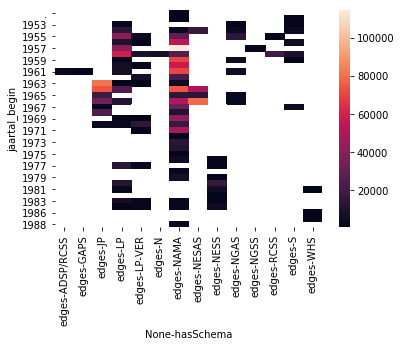

In [114]:
sns.heatmap(schemes)

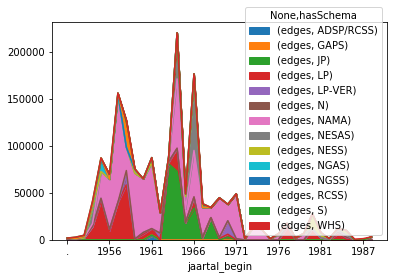

In [121]:
schemes.plot.area()

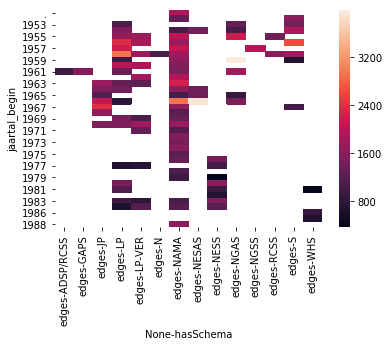

In [120]:
schemes_mean = pd.pivot_table(units_edges, index=['jaartal_begin'], columns=['hasSchema'], values=['edges'], aggfunc='mean')
sns.heatmap(schemes_mean)

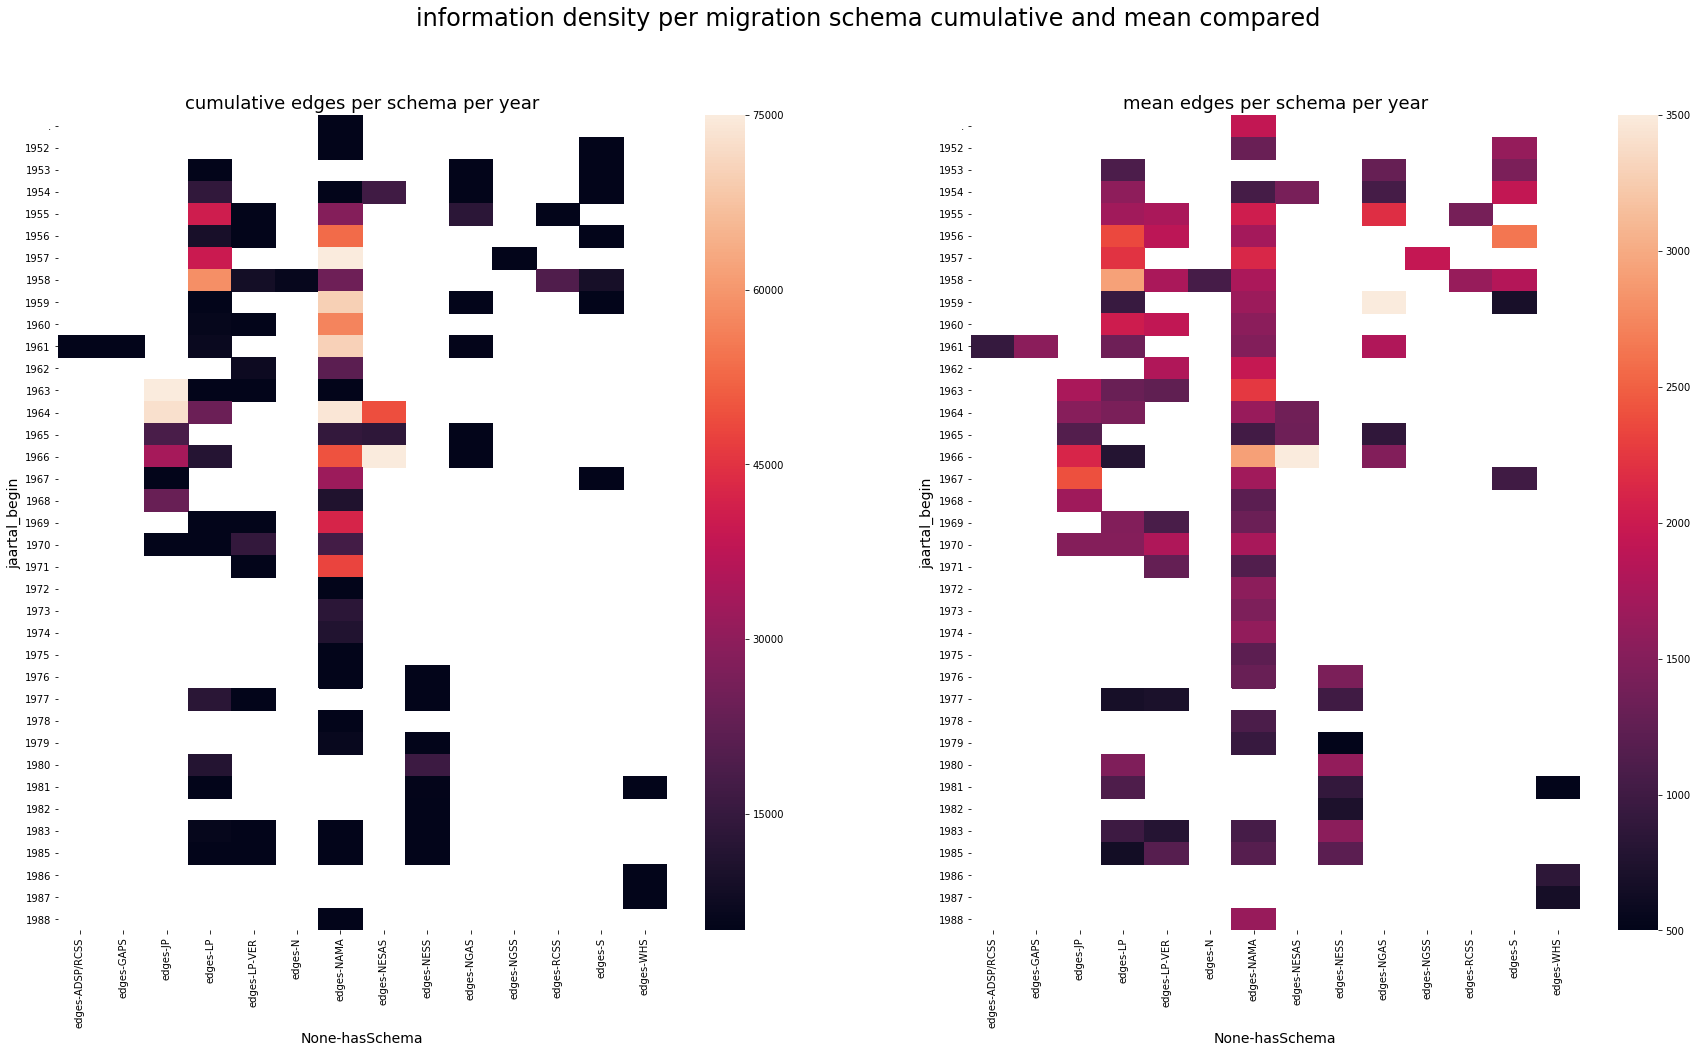

In [123]:
fig = plt.figure(figsize=(30, 15))
fig.suptitle("information density per migration schema cumulative and mean compared",fontsize=24)


ax1 = fig.add_subplot(121)
ax1.set_xlabel('schema', fontsize=14)
ax1.set_ylabel('edges', fontsize=14)
ax1.set_title("cumulative edges per schema per year", fontsize=18)
sns.heatmap(schemes, vmin=5000, vmax=75000, ax=ax1)

ax2 = fig.add_subplot(122)
ax2.set_xlabel('schema', fontsize=14)
ax2.set_ylabel('edges', fontsize=14)
ax2.set_title("mean edges per schema per year", fontsize=18)
sns.heatmap(schemes_mean, vmin=500, vmax=3500, ax=ax2)

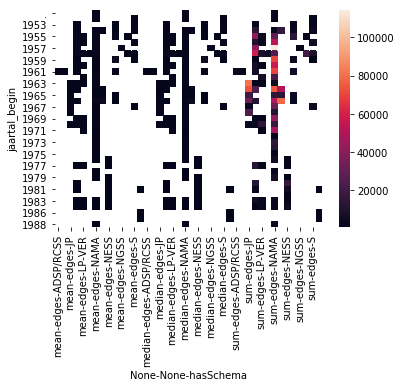

In [125]:
#it appears pandas can combine both aggregations, lets try that out
schemes_aggregated = pd.pivot_table(units_edges, index=['jaartal_begin'], columns=['hasSchema'], values=['edges'], aggfunc=[np.mean,np.median, np.sum])
sns.heatmap(schemes_aggregated)
# this works. Nice for comparisons and detailed analysis, but not very useful for visualisation as only the sum jumps out

## Analysis

The uneven distribution among the different migration schemes, that were administrative instruments under which migration took part, makes it clear that the administrative genesis of the migration cards had at least partial influence on the way the cards were filled. This can only be explained from the institutional background and mostly politicy decisions that influenced it, that is from a source external to the one under consideration. Moreover, the graphs only give a visual overview of the distribution, but for (possible) more detailed conclusions, further analysis is needed. It will be provided below, but first we turn to the other features in the dataset.

The proper individual situation of the migrant units involved will likely have played a part as well. 

In [189]:
# first let's see which values each of the relevant fields has
for item in ['hasUnit', 'samenstelling', 'geslacht', 'hasReligion', 'adresAantal']:
    #first we make them pandas categories
    units[item] = units[item].astype("category")
    #print("%s: %s" % (item, units_edges[item].unique))
    print("%s: %s \n" % (item, units[item].cat.categories))

hasUnit: Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64') 

samenstelling: Index(['Alleen', 'Echtpaar', 'Gezin', 'Man', 'Vrouw met kinderen'], dtype='object') 

geslacht: Index(['Man', 'Vrouw', 'Weinig info', 'onbekend'], dtype='object') 

hasReligion: Index(['Baptist', 'Chr', 'Geen', 'Geref.', 'Luthers', 'NDH', 'NH',
       'Niet ingevuld', 'Pinkstergem.', 'Prot. Kath.', 'Protestant', 'R.K.',
       'RK', 'Remonstrant', 'geen', 'onbekend', 'protestant'],
      dtype='object') 

adresAantal: Float64Index([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
              11.0],
             dtype='float64') 



In [195]:
#'samenstelling' and 'hasReligion' have some fake categories that we first need to merge
units.samenstelling.replace('gezin', 'Gezin', inplace=True)
units.samenstelling.cat.remove_unused_categories(inplace=True)

units.hasReligion.replace('RK', 'R.K.', inplace=True)
units.hasReligion.replace('protestant', 'Protestant', inplace=True)
units.hasReligion.cat.remove_unused_categories(inplace=True)




In [ ]:
units

In [191]:
samenstelling_distribution = units.pivot_table(index='year', columns=['samenstelling'], values=['persoonsId'], aggfunc='count')
samenstelling_distribution

persoonsId                                       
samenstelling     Alleen Echtpaar Gezin  Man Vrouw met kinderen
year                                                           
0                   76.0      6.0  31.0  3.0                NaN
1946                 2.0      NaN   NaN  NaN                NaN
1948                 NaN      1.0   NaN  NaN                NaN
1949                 1.0      NaN   NaN  NaN                NaN
1950                 2.0      2.0   5.0  NaN                NaN
1951                 9.0      4.0   5.0  NaN                1.0
1952                 4.0      3.0  14.0  1.0                NaN
1953                 1.0      5.0   5.0  NaN                NaN
1954                12.0      1.0  13.0  NaN                NaN
1955                37.0      8.0  16.0  NaN                NaN
1956                17.0     11.0  39.0  NaN                1.0
1957                19.0      3.0  15.0  NaN                NaN
1958                16.0      6.0  12.0  NaN                NaN
1959                22.0      4.0  16.0  NaN                NaN
1960                13.0     16.0  26.0  NaN                NaN
1961                 9.0      6.0  14.0  NaN                NaN
1962                 8.0      2.0   3.0  NaN                NaN
1963                23.0      4.0  11.0  NaN                NaN
1964                29.0      8.0  21.0  NaN                NaN
1965                11.0      6.0  11.0  NaN                NaN
1966                16.0      3.0   3.0  NaN                NaN
1967                 4.0      4.0   5.0  NaN                NaN
1968                20.0      NaN   5.0  NaN                NaN
1969                10.0      1.0   5.0  NaN                NaN
1970                 9.0      5.0   5.0  NaN                NaN
1971                 5.0     11.0   3.0  NaN                NaN
1972                 3.0      NaN   1.0  NaN                NaN
1973                 3.0      NaN   3.0  NaN                NaN
1974                 4.0      1.0   5.0  NaN                NaN
1976                 5.0      4.0   2.0  NaN                NaN
1977                 5.0      NaN   NaN  NaN                NaN
1978                 4.0      NaN   1.0  NaN                NaN
1979                 NaN      1.0   NaN  NaN                NaN
1980                 1.0      NaN   2.0  NaN                NaN
1981                 3.0      1.0   8.0  NaN                NaN
1982                 2.0      NaN   3.0  NaN                NaN
1983                 NaN      1.0   2.0  NaN                NaN
1984                 NaN      2.0   2.0  NaN                NaN
1986                 2.0      2.0   1.0  NaN                NaN
1987                 1.0      NaN   NaN  NaN                NaN
1990                 1.0      NaN   NaN  NaN                NaN
onbekend             1.0      NaN   1.0  NaN                NaN

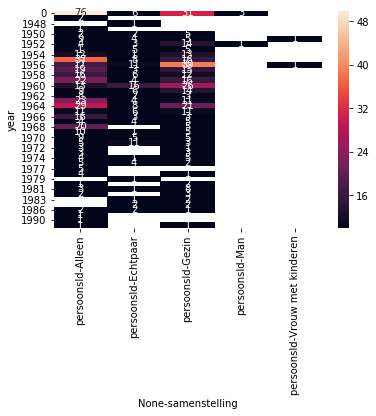

In [160]:
sns.heatmap(samenstelling_distribution, annot=True, vmin=10, vmax=50)

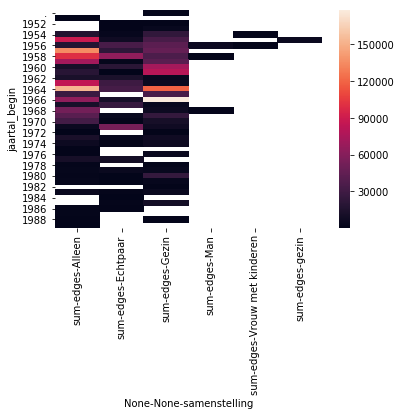

In [146]:
#type of unit ('alone', 'couple', 'family', 'man', 'woman with children')
composition_aggregated = pd.pivot_table(units_edges, index=['jaartal_begin'], columns=['samenstelling'], values=['edges'], aggfunc=[np.sum])
sns.heatmap(composition_aggregated)

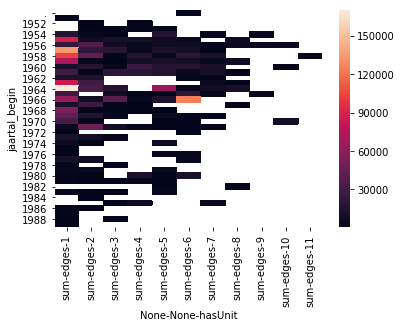

In [172]:
#size of the migrant unit
unitsize_aggregated = pd.pivot_table(units_edges, index=['jaartal_begin'], columns=['hasUnit'], values=['edges'], aggfunc=[np.sum])
sns.heatmap(unitsize_aggregated)

In [281]:
#tabulate the distribution of unit types among the schemes
units_schema = pd.crosstab(units.samenstelling, units.hasSchema)
units_schema

hasSchema,ADSP/RCSS,DNS,FMS,GAPS,JP,LP,LP-VER,N,NAMA,NESAS,NESS,NGAS,NGSS,RCSS,S,WHS,geen
samenstelling,,,,,,,,,,,,,,,,,
Alleen,2,1,0,2,50,50,18,3,112,0,10,0,0,8,6,4,2
Echtpaar,0,0,0,0,1,27,5,1,57,0,1,0,0,0,3,0,0
Gezin,0,0,2,1,0,23,2,0,158,22,14,15,2,5,9,0,1
Man,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Vrouw met kinderen,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


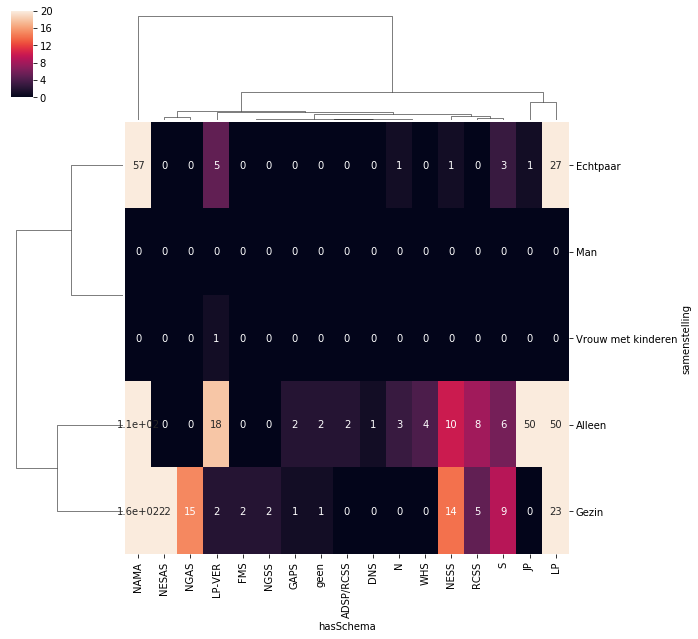

In [285]:
sns.clustermap(units_schema, annot=True, vmin=0, vmax=20)

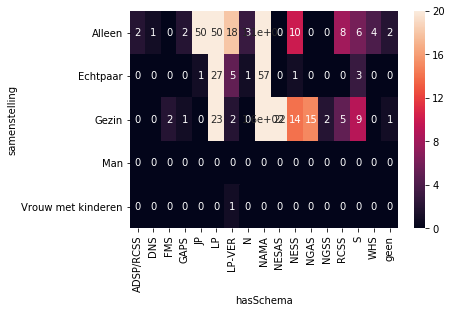

In [286]:
sns.heatmap(units_schema, annot=True, vmin=0, vmax=20)

In [169]:
pd.crosstab(units_edges.samenstelling, units_edges.edges, margins=True) 

# hier moet ik nog s over nadenken: edges opdelen in groepen?

edges,46,122,219,231,238,267,341,346,348,355,...,3614,3616,3662,3988,4013,4065,4728,4989,6654,All
samenstelling,,,,,,,,,,,,,,,,,,,,,
Alleen,1,1,0,0,1,0,1,0,1,1,...,4,0,0,0,0,9,0,4,0,814
Echtpaar,0,0,0,9,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,273
Gezin,0,0,1,0,0,0,1,0,0,0,...,0,1,1,1,0,0,0,0,20,559
Man,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
Vrouw met kinderen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
gezin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
All,1,1,1,9,1,1,2,1,1,1,...,4,1,1,1,1,9,1,4,20,1660


In [167]:
units_edges.groupby('geslacht').describe()

adresAantal                                                edges  \
                  count      mean       std  min  25%  50%  75%   max  count   
geslacht                                                                       
Man               642.0  1.616822  2.092158 -1.0  1.0  2.0  2.0   7.0  642.0   
Vrouw             135.0  2.125926  2.280448 -1.0  1.0  2.0  4.0  10.0  135.0   
Weinig info         8.0 -0.500000  0.925820 -1.0 -1.0 -1.0 -0.5   1.0    8.0   
onbekend            1.0 -1.000000       NaN -1.0 -1.0 -1.0 -1.0  -1.0    1.0   

                           ...    persoonsId          referencesPerson  \
                    mean   ...           75%      max            count   
geslacht                   ...                                           
Man          1419.548287   ...      40968.00  51424.0            642.0   
Vrouw        1505.792593   ...      27997.00  50561.0            135.0   
Weinig info   668.125000   ...      12925.25  31124.0              8.0   
onbekend      419.000000   ...      31418.00  31418.0              1.0   

                                                                              \
                     mean           std      min      25%      50%       75%   
geslacht                                                                       
Man          29678.528037  14064.896035    178.0  23328.0  33146.0  40968.00   
Vrouw        16160.214815  15649.720697      1.0   5918.0   5918.0  27997.00   
Weinig info  13657.375000   7726.869204   3617.0  11745.5  12384.5  12925.25   
onbekend     31418.000000           NaN  31418.0  31418.0  31418.0  31418.00   

                      
                 max  
geslacht              
Man          51424.0  
Vrouw        50561.0  
Weinig info  31124.0  
onbekend     31418.0  

[4 rows x 88 columns]

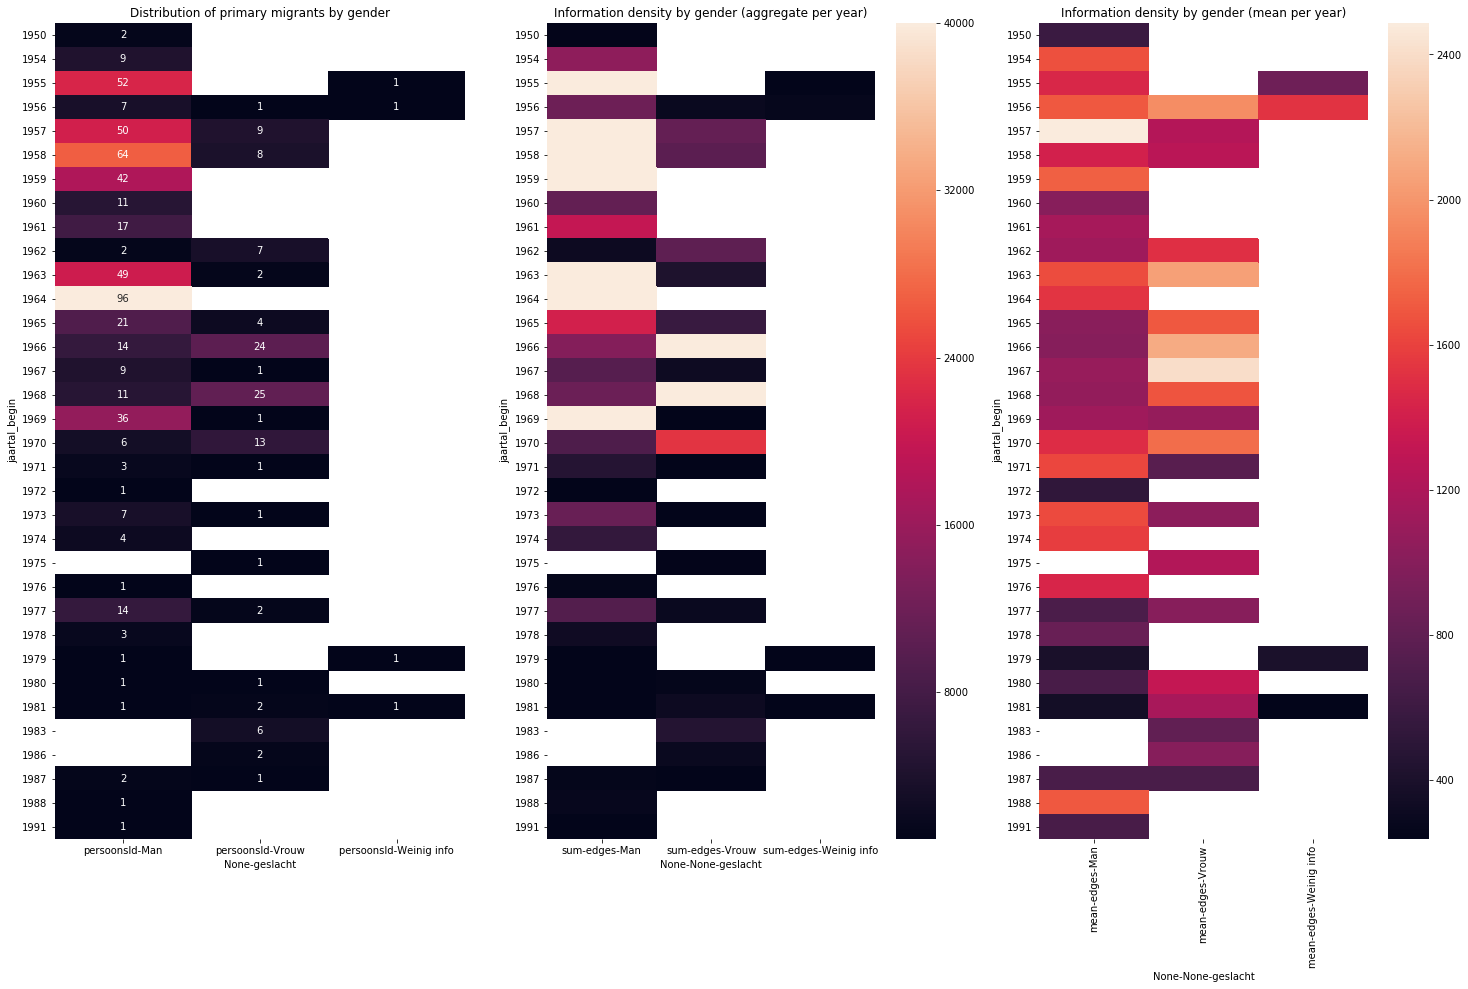

In [274]:
geslacht_aggregated_sum = pd.pivot_table(units_edges, 
                                         index=['jaartal_begin'], 
                                         columns=[units_edges.geslacht], 
                                         values=['edges'], aggfunc=[np.sum])
geslacht_aggregated_mean = pd.pivot_table(units_edges, 
                                         index=['jaartal_begin'], 
                                         columns=[units_edges.geslacht], 
                                         values=['edges'], aggfunc=[np.mean])
geslacht_distribution = pd.pivot_table(units_edges, index=['jaartal_begin'], columns=[units_edges.geslacht], values=['persoonsId'], aggfunc="count")
fig = plt.figure(figsize=(25, 15))
ax1 = fig.add_subplot(131)
ax1.set_title("Distribution of primary migrants by gender")
sns.heatmap(geslacht_distribution, annot=True, ax=ax1, cbar=False)

ax2 = fig.add_subplot(132)
ax2.set_title("Information density by gender (aggregate per year)")
sns.heatmap(geslacht_aggregated_sum, vmin=1000, vmax=40000, ax=ax2)

ax3 = fig.add_subplot(133)
ax3.set_title("Information density by gender (mean per year)")
ax3.set_xlabel("xlabel")
sns.heatmap(geslacht_aggregated_mean, ax=ax3)

## Analysis
It is interesting that there seems to be a shift in the main migrant gender from men to women over time. This is partially related by the growing number (in the cells of the left graph) of women that were registered as main migrant, but certainly not completely. Note however that the absolute number of women is usually small.

In [203]:
units_edges.hasReligion = units_edges.hasReligion.astype('category') 
units_edges.hasReligion.replace('RK', 'R.K.', inplace=True)
units_edges.hasReligion.replace('protestant', 'Protestant', inplace=True)
units_edges.hasReligion.cat.remove_unused_categories(inplace=True)

In [225]:
norms = {'protestant': ['Protestant', 'protestant', 'NDH', 'NH', 'Geref.', 'Chr.','Chr'],
                        'catholic' :['R.K.'],
                        'no_religion': ['geen','Geen'],
                        'unknown': ['Niet ingevuld','onbekend', ],
                        'other' : ['Baptist' , 'Luthers',  'Pinkstergem.', 'Prot. Kath.','Remonstrant']}

# reverse dictionary for mapping
rev_norms = {svalue: key for key, value in norms.items() for svalue in value}

units_edges['normalized_religion'] = units.hasReligion.replace(rev_norms)
units_edges.normalized_religion = units_edges.normalized_religion.astype('category')
units_edges.normalized_religion.cat.categories

Index(['catholic', 'no_religion', 'other', 'protestant', 'unknown'], dtype='object')

In [228]:
aggregate_religion = units_edges.pivot_table(columns=units_edges.hasReligion, index=units_edges.jaartal_begin, values=['edges'], aggfunc='sum')

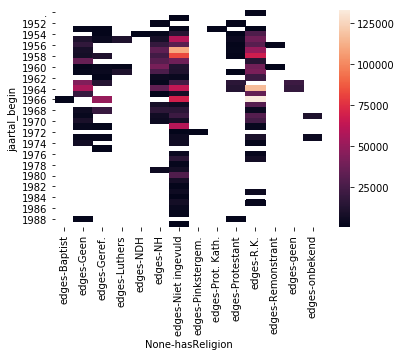

In [229]:
sns.heatmap(aggregate_religion)

In [257]:
#religions further normalized and different measures compared


religion_aggregated = pd.pivot_table(units_edges, index=['jaartal_begin'], 
                                     columns=[units_edges.normalized_religion], 
                                     values=['persoonsId'], 
                                     aggfunc="count")
religion_aggregated

persoonsId                                     
normalized_religion   catholic no_religion other protestant unknown
jaartal_begin                                                      
.                          NaN         NaN   NaN        NaN     1.0
1950                       NaN         NaN   NaN        NaN     NaN
1952                       NaN         NaN   NaN        NaN     NaN
1953                       NaN         NaN   NaN        NaN     NaN
1954                       4.0         5.0   NaN        3.0     5.0
1955                       4.0         2.0   NaN        2.0     4.0
1956                       4.0         4.0   NaN        3.0    11.0
1957                      10.0         4.0   1.0        5.0    17.0
1958                      12.0         1.0   1.0       11.0     4.0
1959                       6.0         NaN   NaN       12.0     7.0
1960                      16.0         6.0   NaN        6.0    15.0
1961                      15.0         8.0   NaN       13.0    11.0
1962                       4.0         NaN   NaN        NaN     6.0
1963                      15.0         6.0   3.0       11.0    13.0
1964                      40.0        19.0   5.0       33.0    54.0
1965                       4.0         2.0   1.0        5.0    20.0
1966                      13.0        16.0   NaN       12.0    37.0
1967                       4.0         1.0   NaN        2.0    17.0
1968                       8.0         8.0   1.0        6.0    15.0
1969                       4.0         NaN   NaN        3.0     7.0
1970                      10.0         2.0   NaN        7.0     5.0
1971                      19.0         NaN   NaN        1.0    14.0
1972                       NaN         NaN   NaN        NaN     NaN
1973                       1.0         1.0   NaN        1.0     2.0
1974                       1.0         NaN   NaN        1.0     2.0
1975                       NaN         NaN   NaN        NaN     NaN
1976                       1.0         NaN   NaN        NaN     4.0
1977                       NaN         NaN   NaN        1.0     NaN
1978                       NaN         NaN   NaN        NaN     NaN
1979                       1.0         NaN   NaN        1.0     NaN
1980                       3.0         NaN   NaN        1.0     6.0
1981                       2.0         1.0   NaN        NaN     2.0
1982                       NaN         NaN   NaN        NaN     NaN
1983                       5.0         NaN   NaN        4.0     2.0
1984                       NaN         NaN   NaN        NaN     NaN
1985                       1.0         NaN   NaN        1.0     2.0
1986                       1.0         NaN   NaN        NaN     NaN
1987                       NaN         NaN   NaN        NaN     NaN
1988                       1.0         NaN   NaN        NaN     1.0
1991                       NaN         NaN   NaN        1.0     NaN

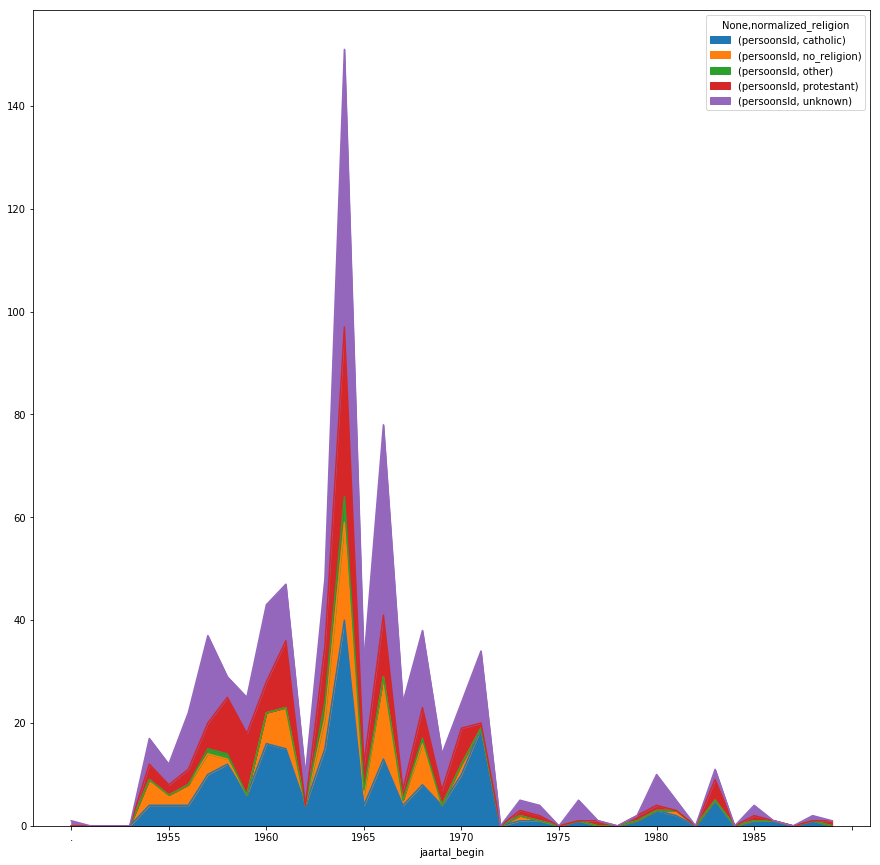

In [290]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(111)
religion_aggregated.plot(kind="area", ax=ax1)

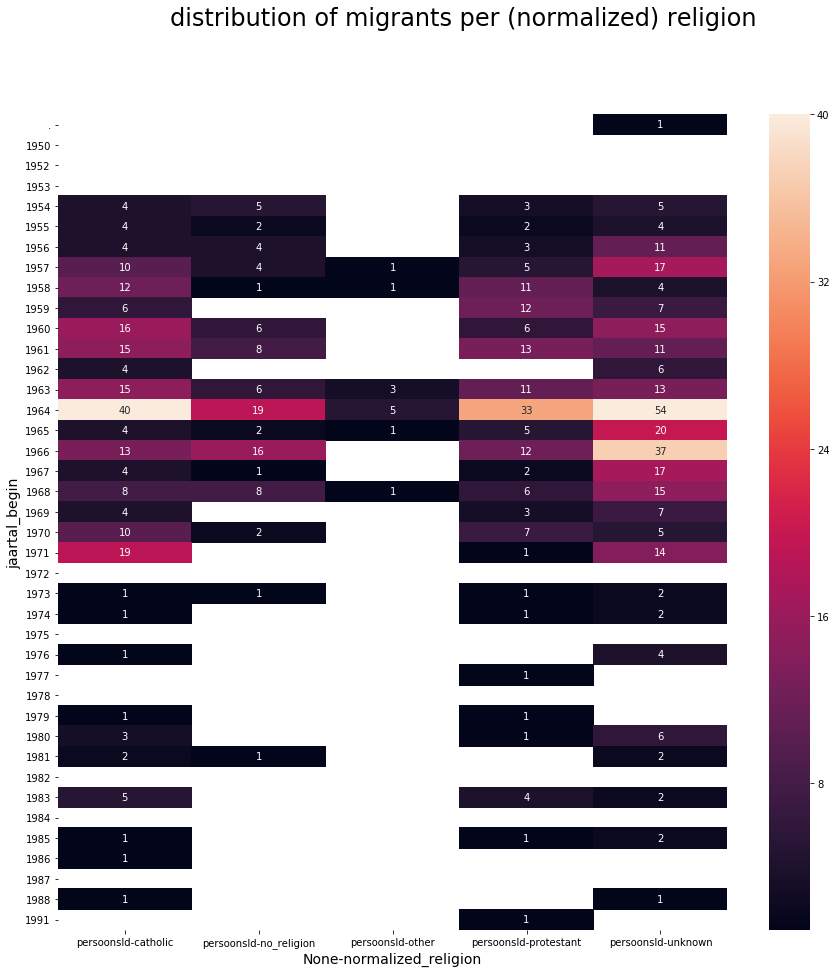

In [256]:

fig = plt.figure(figsize=(15, 15))
fig.suptitle("distribution of migrants per (normalized) religion",fontsize=24)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('religion(normalized)', fontsize=14)
ax1.set_ylabel('edges', fontsize=14)
#ax1.set_title(" per religion per year", fontsize=18)
sns.heatmap(religion_aggregated, vmax=40, annot=True,ax=ax1)

## Analysis

The distribution over the different religions is not especially biased to one or another religion. Is this the same with the distribution of the information density on their cards? 

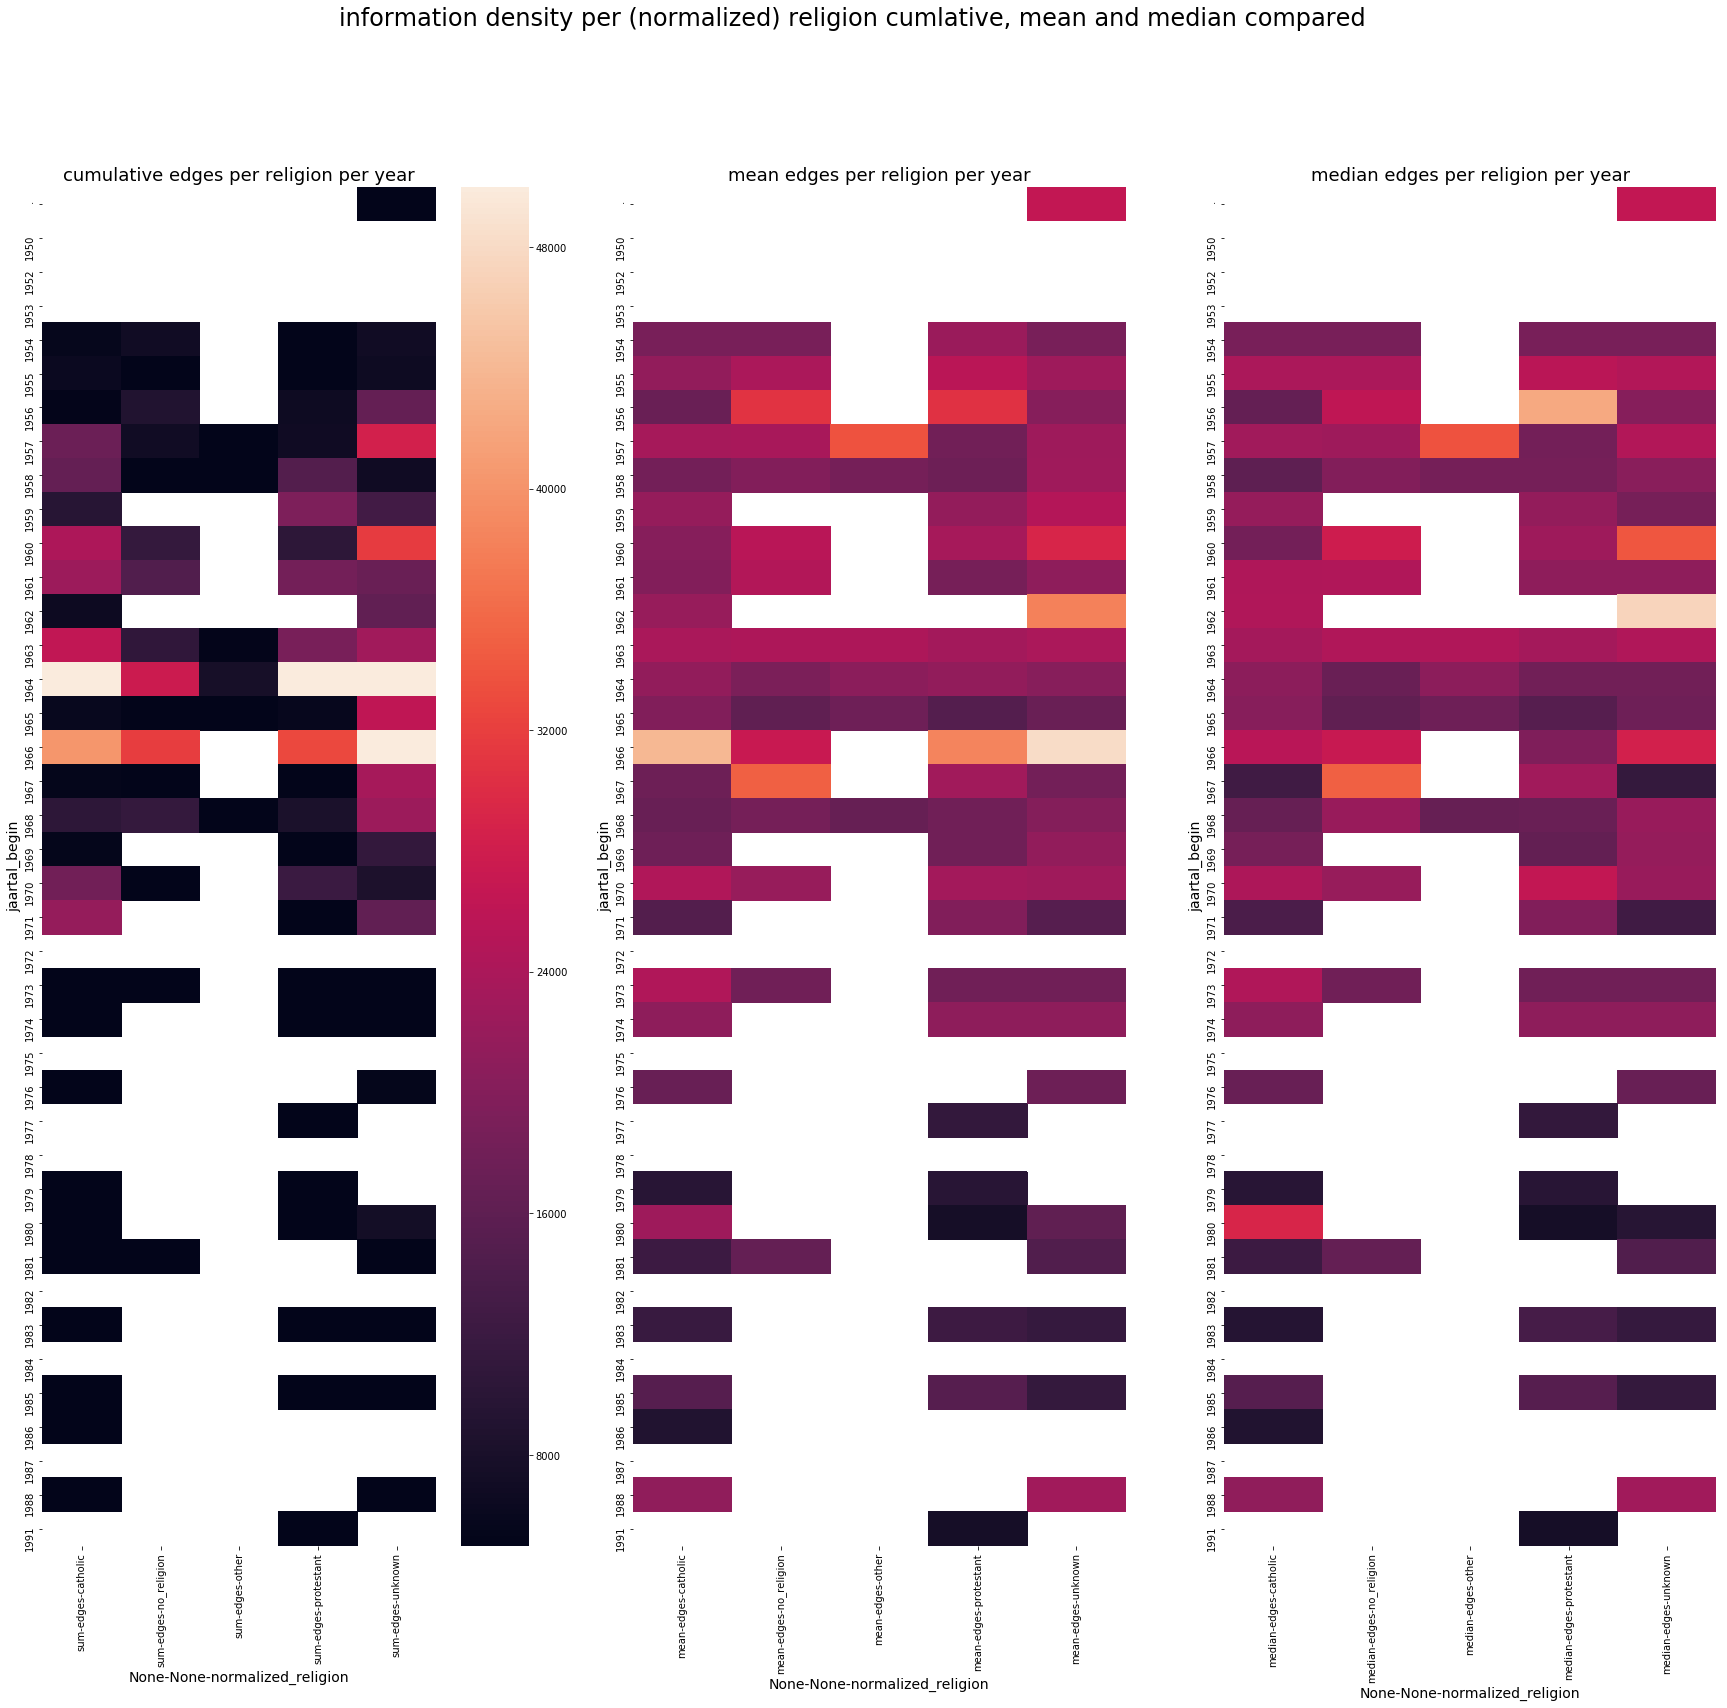

In [248]:
#religions further normalized and different measures compared


religion_aggregated_sum = pd.pivot_table(units_edges, index=['jaartal_begin'], 
                                     columns=[units_edges.normalized_religion], 
                                     values=['edges'], 
                                     aggfunc=[np.sum])
religion_aggregated_mean = pd.pivot_table(units_edges, index=['jaartal_begin'], 
                                     columns=[units_edges.normalized_religion], 
                                     values=['edges'], 
                                     aggfunc=[np.mean])
religion_aggregated_median = pd.pivot_table(units_edges, index=['jaartal_begin'], 
                                     columns=[units_edges.normalized_religion], 
                                     values=['edges'], 
                                     aggfunc=[np.median])


fig = plt.figure(figsize=(30, 25))
fig.suptitle("information density per (normalized) religion cumlative, mean and median compared",fontsize=24)


ax1 = fig.add_subplot(131)
ax1.set_xlabel('religion(normalized)', fontsize=14)
ax1.set_ylabel('edges', fontsize=14)
ax1.set_title("cumulative edges per religion per year", fontsize=18)
sns.heatmap(religion_aggregated_sum, vmin=5000, vmax=50000, ax=ax1)

ax2 = fig.add_subplot(132)
ax2.set_xlabel('religion(normalized)', fontsize=14)
ax2.set_ylabel('edges', fontsize=14)
ax2.set_title("mean edges per religion per year", fontsize=18)
sns.heatmap(religion_aggregated_mean, vmin=500, vmax=3500, ax=ax2, cbar=False)
                                            
ax3 = fig.add_subplot(133)
ax3.set_xlabel('religion(normalized)', fontsize=14)
ax3.set_ylabel('edges', fontsize=14)
ax3.set_title("median edges per religion per year", fontsize=18)
sns.heatmap(religion_aggregated_median, vmin=500, vmax=3500, ax=ax3, cbar=False)

In [289]:
#sns.clustermap(religion_aggregated_median, vmin=500, vmax=3500, cbar=False)
religion_aggregated_median # question: can the median be used as a measure???

median                                       
                       edges                                       
normalized_religion catholic no_religion   other protestant unknown
jaartal_begin                                                      
.                        NaN         NaN     NaN        NaN  1940.0
1950                     NaN         NaN     NaN        NaN     NaN
1952                     NaN         NaN     NaN        NaN     NaN
1953                     NaN         NaN     NaN        NaN     NaN
1954                  1419.0      1419.0     NaN     1419.0  1419.0
1955                  1772.0      1772.0     NaN     1872.0  1822.0
1956                  1282.0      1917.5     NaN     2987.0  1513.0
1957                  1698.5      1680.5  2421.0     1385.0  1821.0
1958                  1235.0      1495.0  1400.0     1400.0  1535.0
1959                  1615.5         NaN     NaN     1604.0  1413.0
1960                  1388.5      2012.0     NaN     1681.5  2437.0
1961                  1797.0      1802.0     NaN     1578.0  1578.0
1962                  1808.0         NaN     NaN        NaN  3324.0
1963                  1725.0      1809.0  1809.0     1725.0  1809.0
1964                  1559.0      1315.0  1559.0     1374.0  1374.0
1965                  1529.0      1247.5  1355.0     1176.0  1355.0
1966                  1864.0      1967.0     NaN     1472.5  2070.0
1967                  1009.5      2496.0     NaN     1706.0   916.0
1968                  1289.0      1648.0  1292.0     1317.0  1648.0
1969                  1403.0         NaN     NaN     1268.0  1624.0
1970                  1788.5      1634.0     NaN     1937.0  1640.0
1971                  1087.0         NaN     NaN     1480.0  1007.0
1972                     NaN         NaN     NaN        NaN     NaN
1973                  1805.0      1365.0     NaN     1365.0  1365.0
1974                  1574.0         NaN     NaN     1574.0  1574.0
1975                     NaN         NaN     NaN        NaN     NaN
1976                  1303.0         NaN     NaN        NaN  1303.0
1977                     NaN         NaN     NaN      908.0     NaN
1978                     NaN         NaN     NaN        NaN     NaN
1979                   822.0         NaN     NaN      822.0     NaN
1980                  2113.0         NaN     NaN      668.0   816.0
1981                   977.5      1275.0     NaN        NaN  1135.5
1982                     NaN         NaN     NaN        NaN     NaN
1983                   801.0         NaN     NaN     1052.0   926.5
1984                     NaN         NaN     NaN        NaN     NaN
1985                  1176.0         NaN     NaN     1176.0   914.0
1986                   762.0         NaN     NaN        NaN     NaN
1987                     NaN         NaN     NaN        NaN     NaN
1988                  1579.0         NaN     NaN        NaN  1702.0
1991                     NaN         NaN     NaN      668.0     NaN

## Analysis of all categorical plots

If we leave the migrants with an unknown religion out of consideration, migrants with a catholic background or without religion seem to have a slightly higher information density than those with a protestant background.

In general, it may be stated that the overall trends of all graphs more or less coincide, and no definite conclusions may be drawn from the plots alone. This should be explored in more detail in the actual numbers, but we will first explore them some more in combination to see whether this yields some more detailed classification. 

First lets do the same exercises with the events


In [297]:
events = pd.read_csv("csvs/extended_events.csv", sep="\t")
events.drop(['Unnamed: 0'], axis=1, inplace=True)
events.columns # too many to remember

Index(['migrant', 'Prs_achternaam', 'actorperson', 'actorperson.1',
       'actorinstitution', 'receptorperson', 'receptorperson.1',
       'receptorinstitution', 'recording_consulate', 'subject', 'day', 'month',
       'year_x', 'remark', 'Unnamed: 14', 'persoonsId', 'initialen',
       'tussenvoegsel', 'achternaam', 'geboortejaar', 'hasBirthPlace',
       'hasResidenceLocation', 'hasSchema', 'hasUnit', 'samenstelling',
       'geslacht', 'hasReligion', 'adresAantal', 'year_y', 'migrantid'],
      dtype='object')